In [1]:
import pandas as pd
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from datetime import datetime


In [2]:
def ExceptionMsg(field,reason):
    return "Exception for "+field+' - '+reason
    

In [3]:

df = pd.read_csv ('Pakistan Largest Ecommerce Dataset.csv')
dfAllExceptions = pd.DataFrame()
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Understanding the file/data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
item_id                  584524 non-null float64
status                   584509 non-null object
created_at               584524 non-null object
sku                      584504 non-null object
price                    584524 non-null float64
qty_ordered              584524 non-null float64
grand_total              584524 non-null float64
increment_id             584524 non-null object
category_name_1          584360 non-null object
sales_commission_code    447349 non-null object
discount_amount          584524 non-null float64
payment_method           584524 non-null object
Working Date             584524 non-null object
BI Status                584524 non-null object
 MV                      584524 non-null object
Year                     584524 non-null float64
Month                    584524 non-null float64
Customer Since           584513 non-null object
M-Y             

In [5]:
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [6]:
#analyse to have a better the categorical columns
cat_col = df.select_dtypes(include=['object'])
values = cat_col.nunique()
print(values)

status                       16
created_at                  789
sku                       84889
increment_id             408785
category_name_1              16
sales_commission_code      7226
payment_method               18
Working Date                789
BI Status                     4
 MV                        9720
Customer Since               26
M-Y                          26
FY                            3
dtype: int64


In [7]:
#Showing the unique values in the column if there are within a certain viewable # e.g. 30
for column in cat_col:
    if df[column].nunique() < 30:
        print('Feature: ', column)
        print('Feature Values: ', df[column].unique())
    else:
        print('Feature: ', column)
        print('Feature with too many unique values, displaying Counts only: ', df[column].nunique())
    print('---------------------------')
        
        

Feature:  status
Feature Values:  ['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' '\\N' 'cod' 'pending'
 nan 'processing' 'payment_review']
---------------------------
Feature:  created_at
Feature with too many unique values, displaying Counts only:  789
---------------------------
Feature:  sku
Feature with too many unique values, displaying Counts only:  84889
---------------------------
Feature:  increment_id
Feature with too many unique values, displaying Counts only:  408785
---------------------------
Feature:  category_name_1
Feature Values:  ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Mobiles & Tablets'
 'Appliances' 'Home & Living' "Men's Fashion" 'Kids & Baby' '\\N' 'Others'
 'Entertainment' 'Computing' 'Superstore' 'Health & Sports' 'Books'
 'School & Education' nan]
---------------------------
Feature:  sales_commission_code
Feature with too many unique values, displaying Counts only:  7226
----

In [8]:

#Cleansing starts here
#Removing the empty columns with no headers
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [9]:
df.head()
print("Before Cleansing # of rows ",df.shape)

Before Cleansing # of rows  (1048575, 21)


In [10]:
#Remove empty rows at the end of the file
df=df.dropna(how='all')
print("After Cleansing empty # rows at the end of the file ",df.shape)

After Cleansing empty # rows at the end of the file  (584524, 21)


In [11]:
#Dropping those with empty category_name_1
filter = df["category_name_1"].isnull() 
dfexception_cat_name = pd.DataFrame()
dfexception_cat_name = df[filter].copy()
dfexception_cat_name["Exception"] = ExceptionMsg("category_name_1","Empty Field") 



In [12]:
df=df.dropna(subset=["category_name_1"])
print("After Cleansing category_name_1 which are empty ",df.shape)


After Cleansing category_name_1 which are empty  (584360, 21)


In [13]:
#Dropping those with empty Customer ID
filter = df["Customer ID"].isnull() 
dfexception_cust_id = pd.DataFrame()
dfexception_cust_id = df[filter].copy()
dfexception_cust_id["Exception"] = ExceptionMsg("Customer ID","Empty Field") 

In [14]:
df=df.dropna(subset=["Customer ID"])
print("After Cleansing Customer ID which are empty ",df.shape)

After Cleansing Customer ID which are empty  (584349, 21)


In [15]:
#Dropping those with empty status
filter = df["status"].isnull() 
dfexception_status = df[filter].copy()
dfexception_status["Exception"] = ExceptionMsg("status","Empty Field")

In [16]:
#Dropping those with empty status
df=df.dropna(subset=["status"])
print("After Cleansing status which are empty ",df.shape)

After Cleansing status which are empty  (584334, 21)


In [17]:
#Filter category_name_1!="/N" 
keep = df["category_name_1"] != "\\N" 
filter = df["category_name_1"] == "\\N" 
dfexception_cat_name_2 = df[filter].copy()
dfexception_cat_name_2["Exception"] = ExceptionMsg("category_name_1","Invalid Content \\N")
#print(dfexception_cat_name_2.shape)  

In [18]:
df= df[keep]
print("After Cleansing category_name_1 which='\\N' rows ",df.shape)

After Cleansing category_name_1 which='\N' rows  (576484, 21)


In [19]:
#Filter BI Status == #REF! 
keep = df["BI Status"] != "#REF!"
filter = df["BI Status"] == "#REF!"
dfexception_bi_status = df[filter].copy()
dfexception_bi_status["Exception"] = ExceptionMsg("BI Status","Invalid Content #REF!")
#print(dfexception_bi_status.shape)  

In [20]:
df= df[keep]
print("After Cleansing BI Status= #REF! rows ",df.shape)

After Cleansing BI Status= #REF! rows  (576483, 21)


In [21]:
#print(df.columns)

In [22]:
#Filter MV =" -   " 
keep = df[" MV "] != " -   "
filter = df[" MV "] == " -   "
dfexception_mv = df[filter].copy()
dfexception_mv["Exception"] = ExceptionMsg("MV","Invalid Content - ")
#print(dfexception_mv.shape)  

In [23]:
df= df[keep]
print("After Cleansing MV = - rows ",df.shape)

After Cleansing MV = - rows  (574280, 21)


In [24]:
is_numeric_dtype(df[" MV "])
df["MV"]=df[" MV "]
#df.drop(" MV ")
#print(df)



In [25]:
#df[df.MV.apply(lambda x: x.isnumeric())]
#print("After Cleansing MV = - rows ",df.shape)
#print(df.columns)

In [26]:
#Cleansing the empty spaces and removing the thousand separators
df["MV"]=df["MV"].str.strip()
df["MV"]=df["MV"].str.replace(",","")

In [27]:
#print("After Cleansing MV = - rows ",df.shape)

In [28]:
#Conversion to integer
df["MV"] = df["MV"].apply(lambda x: float(x))
df["price"] = df["price"].apply(lambda x: float(x))
df["qty_ordered"] = df["qty_ordered"].apply(lambda x: int(x))


In [29]:
#calculate a separate table of grand totals with increment_id as key
#df["calculated_mv"]= df.apply(lambda x: x['MV'] - x['discount_amount'], axis=1)
df["calculated_mv"]= df.apply(lambda x: x['price'] * x['qty_ordered'] - x['discount_amount'], axis=1)

df_gt_by_incre=df.groupby(["increment_id"])["calculated_mv"].sum().reset_index().rename(columns={'calculated_mv':'calculated_grandtotal'})




In [30]:
#test=df_gt_by_incre["increment_id"]==100148708
#print(df_gt_by_incre[test])

In [31]:
df.shape
df=pd.merge(df,df_gt_by_incre,on='increment_id')
df.shape

(574280, 24)

In [32]:
#test=df["increment_id"]==100148708
#print(df[test])

In [33]:
#Reconciliation of grand_total Value columns

df["recon_grandtotal"]=df.apply(lambda x: x["grand_total"] - x["calculated_grandtotal"], axis=1)




In [34]:
#test=df["recon_grandtotal"]!=0
#df[test].head

In [35]:
print("These are all that is left after the cleansing ",df.shape)


These are all that is left after the cleansing  (574280, 25)


In [36]:

#these might be potential fraud cases, hence we may not want to destroy or cleanse these
filtermismatch=df["recon_grandtotal"] != 0
print("These are mismatches between MV, discount and grand_total, but they should not be omitted as it might be potential bugs or fraud cases: ",df[filtermismatch].shape)

#Export MV mismatch report File to drive
df[filtermismatch].to_csv('data_mv_mismatch_report.csv',sep=",",index=False)

#these are the cases that match
filtermatch=df["recon_grandtotal"] == 0
print("These are matches between MV, discount and grand_total: ",df[filtermatch].shape)





These are mismatches between MV, discount and grand_total, but they should not be omitted as it might be potential bugs or fraud cases:  (129387, 25)
These are matches between MV, discount and grand_total:  (444893, 25)


In [37]:
#Export Cleanse File to drive
print("Before export this is all that's left after the cleansing ",df.shape)
df.to_csv('data_cleansed.csv',sep=",",index=False)

Before export this is all that's left after the cleansing  (574280, 25)


In [38]:
#Preparing Exception Report
frames = [dfexception_cat_name,dfexception_cust_id,dfexception_status,dfexception_cat_name_2,dfexception_bi_status,dfexception_mv]
dfAllExceptions=pd.concat(frames)

In [39]:
print("Compiling Exceptions, Total Exceptions ",dfAllExceptions.shape)
dfAllExceptions.to_csv('Exception_Report.csv',sep=",",index=False)
dfAllExceptions.head()

Compiling Exceptions, Total Exceptions  (10244, 22)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Exception
425895,725194.0,order_refunded,1/2/2018,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,NaN,NaN,...,1/2/2018,Valid,198,2018.0,1.0,2017-8,1-2018,FY18,59587.0,Exception for category_name_1 - Empty Field
431194,731122.0,received,1/15/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,NaN,NaN,...,1/15/2018,Valid,99,2018.0,1.0,2017-8,1-2018,FY18,59587.0,Exception for category_name_1 - Empty Field
432492,732569.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,NaN,NaN,...,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0,Exception for category_name_1 - Empty Field
432494,732572.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,NaN,NaN,...,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0,Exception for category_name_1 - Empty Field
432496,732575.0,order_refunded,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,NaN,NaN,...,1/19/2018,Valid,99,2018.0,1.0,2018-1,1-2018,FY18,85633.0,Exception for category_name_1 - Empty Field


In [40]:
dfAllExceptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 425895 to 584271
Data columns (total 22 columns):
item_id                  10244 non-null float64
status                   10229 non-null object
created_at               10244 non-null object
sku                      10227 non-null object
price                    10244 non-null float64
qty_ordered              10244 non-null float64
grand_total              10244 non-null float64
increment_id             10244 non-null object
category_name_1          10080 non-null object
sales_commission_code    9228 non-null object
discount_amount          10244 non-null float64
payment_method           10244 non-null object
Working Date             10244 non-null object
BI Status                10244 non-null object
 MV                      10244 non-null object
Year                     10244 non-null float64
Month                    10244 non-null float64
Customer Since           10233 non-null object
M-Y                      10244 no

In [45]:
#print(dfExc)
dfAllExceptions["Y-M"]= pd.to_datetime(dfAllExceptions['Working Date'])
#dfAllExceptions.info()


In [46]:
dfAllExceptions['Y-M']=dfAllExceptions['Y-M'].dt.strftime("%Y-%m")

In [47]:
dfExcHM=dfAllExceptions.groupby(["Exception","Y-M"]).size().reset_index(name='Count')


In [48]:
print(dfExcHM)

                                            Exception      Y-M  Count
0     Exception for BI Status - Invalid Content #REF!  2016-07      1
1             Exception for Customer ID - Empty Field  2018-01      4
2             Exception for Customer ID - Empty Field  2018-03      7
3               Exception for MV - Invalid Content -   2016-07     11
4               Exception for MV - Invalid Content -   2016-08     10
5               Exception for MV - Invalid Content -   2016-10      2
6               Exception for MV - Invalid Content -   2016-11     46
7               Exception for MV - Invalid Content -   2016-12     24
8               Exception for MV - Invalid Content -   2017-01     23
9               Exception for MV - Invalid Content -   2017-05     85
10              Exception for MV - Invalid Content -   2017-06    341
11              Exception for MV - Invalid Content -   2017-07     75
12              Exception for MV - Invalid Content -   2017-08     12
13              Exce

In [49]:
dfExcHM=pd.pivot_table(dfExcHM, values='Count', 
                     index=['Exception'], 
                     columns='Y-M')
dfExcHM=dfExcHM.fillna(0)

In [50]:
dfExcHM=dfExcHM.fillna(0)
print(dfExcHM)

Y-M                                                 2016-07  2016-08  2016-09  \
Exception                                                                       
Exception for BI Status - Invalid Content #REF!         1.0      0.0      0.0   
Exception for Customer ID - Empty Field                 0.0      0.0      0.0   
Exception for MV - Invalid Content -                   11.0     10.0      0.0   
Exception for category_name_1 - Empty Field             0.0      0.0      0.0   
Exception for category_name_1 - Invalid Content \N    731.0    178.0   1011.0   
Exception for status - Empty Field                      0.0      0.0      0.0   

Y-M                                                 2016-10  2016-11  2016-12  \
Exception                                                                       
Exception for BI Status - Invalid Content #REF!         0.0      0.0      0.0   
Exception for Customer ID - Empty Field                 0.0      0.0      0.0   
Exception for MV - Invalid 

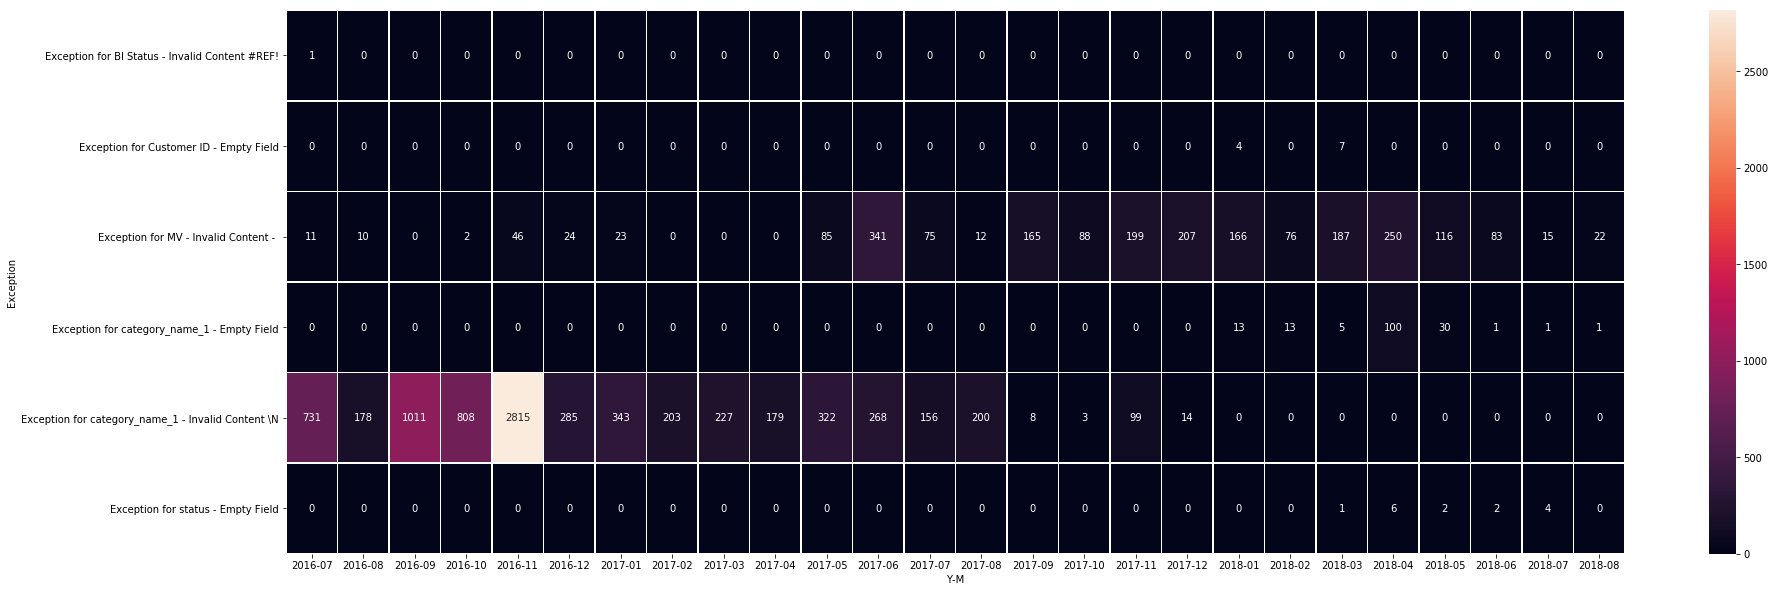

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(30,10))

sns.heatmap(dfExcHM, annot=True, linewidths=.5, ax=ax, fmt='g')